# Predictiong model testing on Dwelling dataset
reference: https://www.youtube.com/watch?v=8FCDpFhd1zk&t=419s

In [1]:
import numpy as np
import pandas as pd

In [78]:
data = pd.read_csv('Dwelling_modelling_final.csv',index_col= 'year',parse_dates=True)
data.head(10)

,Unnamed: 0,clue_small_area,Total_Dwelling
year,,,
2002-01-01,0,Carlton,47
2003-01-01,1,Carlton,754
2004-01-01,2,Carlton,58
2005-01-01,3,Carlton,394
2006-01-01,4,Carlton,310
2007-01-01,5,Carlton,676
2008-01-01,6,Carlton,173
2009-01-01,7,Carlton,291
2010-01-01,8,Carlton,35


In [83]:
data.index.dtype

dtype('<M8[ns]')

In [66]:
data = data.drop(['Unnamed: 0'], axis =1)

In [67]:
data.head(5)

,clue_small_area,year,Total_Dwelling
0,Carlton,2002,47
1,Carlton,2003,754
2,Carlton,2004,58
3,Carlton,2005,394
4,Carlton,2006,310


In [68]:
data.dtypes

clue_small_area    object
year                int64
Total_Dwelling      int64
dtype: object

In [85]:
data.index = pd.to_datetime(data.index,format=('%Y'),exact ='False')

In [86]:
data.index

DatetimeIndex(['2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01',
               ...
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
               '2022-01-01', '2023-01-01'],
              dtype='datetime64[ns]', name='year', length=220, freq=None)

In [87]:
data.head(10)

,Unnamed: 0,clue_small_area,Total_Dwelling
year,,,
2002-01-01,0,Carlton,47
2003-01-01,1,Carlton,754
2004-01-01,2,Carlton,58
2005-01-01,3,Carlton,394
2006-01-01,4,Carlton,310
2007-01-01,5,Carlton,676
2008-01-01,6,Carlton,173
2009-01-01,7,Carlton,291
2010-01-01,8,Carlton,35


In [89]:
data = data.drop(['Unnamed: 0'], axis =1)

In [90]:
data.head(5)

,clue_small_area,Total_Dwelling
year,,
2002-01-01,Carlton,47
2003-01-01,Carlton,754
2004-01-01,Carlton,58
2005-01-01,Carlton,394
2006-01-01,Carlton,310


### Need to place this into a function later on
Using ARIMA for timeseries

In [103]:
dataC = data.loc[data['clue_small_area']=='Carlton'].iloc[:,-1].reset_index(drop=False)
dataC.head(2)

,year,Total_Dwelling
0,2002-01-01,47
1,2003-01-01,754


In [104]:
dataC.year.dtype

dtype('<M8[ns]')

In [109]:
dataC.index= dataC.year

In [110]:
dataC.head(2)

,year,Total_Dwelling
year,,
2002-01-01,2002-01-01,47
2003-01-01,2003-01-01,754


In [28]:
import matplotlib as plt

In [111]:
dataC.head(2)

,year,Total_Dwelling
year,,
2002-01-01,2002-01-01,47
2003-01-01,2003-01-01,754


<Axes: xlabel='year'>

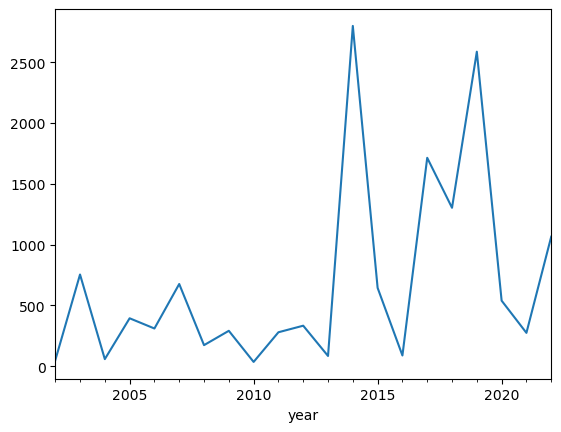

In [112]:
dataC['Total_Dwelling'].plot()

In [133]:
from statsmodels.tsa.arima.model import ARIMA

In [407]:
import warnings

In [415]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [601]:
def arima_model(data, order_,trend_, test_,trend_offset_):
    '''
        Function is used to feed the ARIMA model with a dataset as data,
        The order is used to tune the model.
        Trend has various inputs such as ‘c’ for constant and ‘t’ for time series.
        Trend offset is also used to tune the model.
        Test provides the timeseries prediction, as current the model is predicting according to the length of the test dataset. The test_ variable provides further prediction pass the last data from the test dataset.
        The test dataset is used to graph along with the predictive dataset. This is done so we can access the model.
        The function also returns the mean squared error for the model.


    '''
    warnings.filterwarnings('ignore')
    train = dataC.iloc[:-2]
    test = dataC.iloc[-2:]
    model = ARIMA(train['Total_Dwelling'],order=order_,trend=trend_,trend_offset=trend_offset_)
    model = model.fit()
    start =len(train)
    end =len(train)+len(test)-1
    pred=model.predict(start=start,end=(end+test_), typ='levels')
    print(pred)
    if test_ == 0:
        print('The mean sqaured error is: ',sqrt(mean_squared_error(pred,test['Total_Dwelling'])))
    pred.plot(legend=True)
    test['Total_Dwelling'].plot(legend=True)
    
    

# Testing the model with various parameters.

2021-01-01     449.752316
2022-01-01    1358.959109
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  242.1784822861295


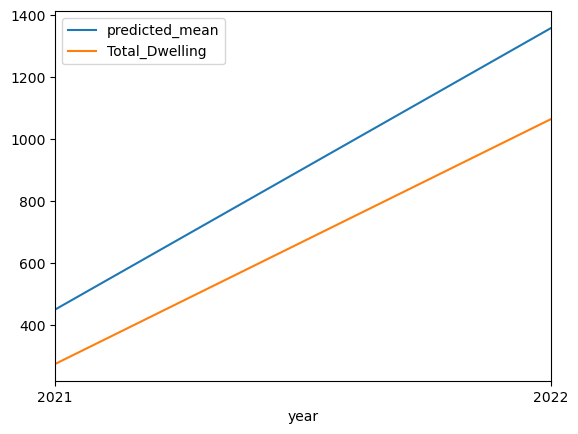

In [651]:
arima_model(dataC, (6,0,3),'c',0,1)

2021-01-01    264.104122
2022-01-01    977.601682
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  62.19483274777443


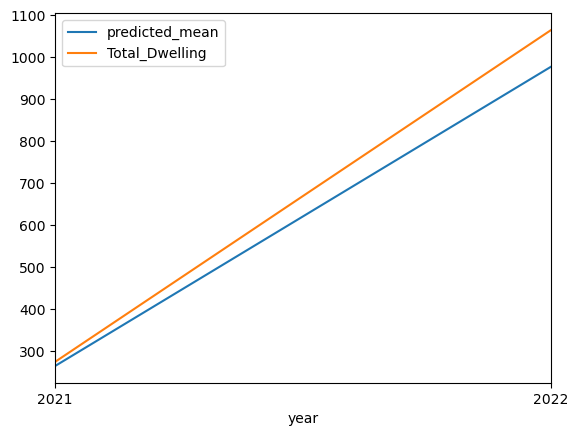

In [652]:
arima_model(dataC, (4,0,3),'t',0,62)

2021-01-01     268.590260
2022-01-01    1136.676667
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  50.82720635267702


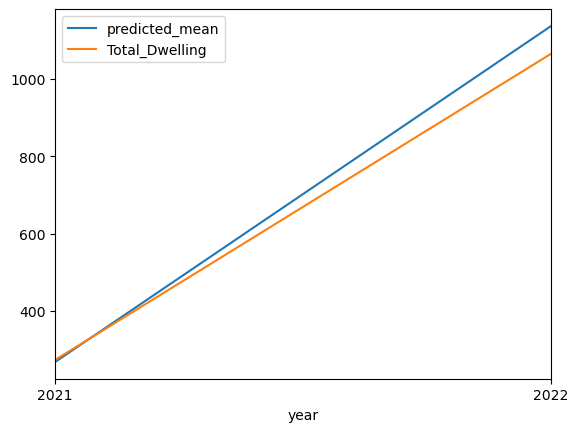

In [654]:
arima_model(dataC, (5,0,2),'t',0,62)

2021-01-01     268.590260
2022-01-01    1136.676667
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  50.82720635267702


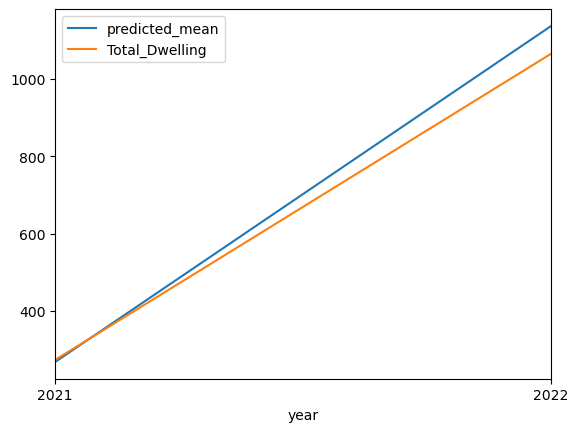

In [655]:
arima_model(dataC, (5,0,2),'t',0,62)

2021-01-01     265.294525
2022-01-01    1020.783868
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  31.86574638989655


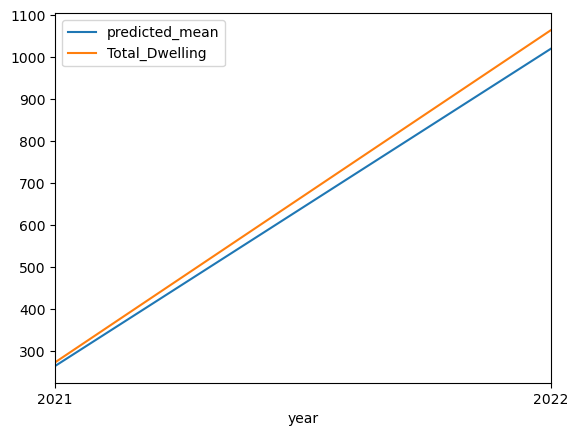

In [664]:
arima_model(dataC, (5,0,2),'t',0,70)

2021-01-01    1358.263403
2022-01-01    1180.869215
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  771.0553814808379


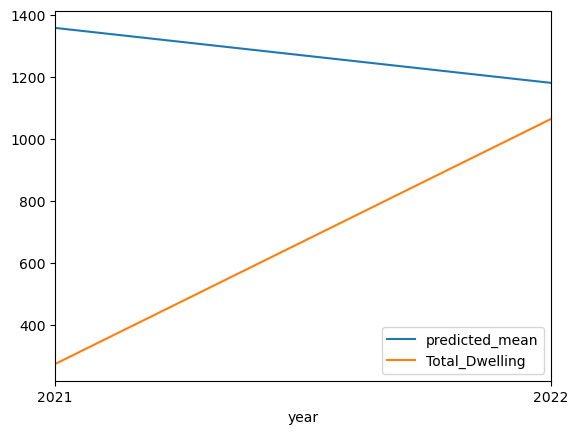

In [646]:
arima_model(dataC, (1,1,1),'t',0,5)

2021-01-01     597.095729
2022-01-01    1599.879852
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  441.86383957253133


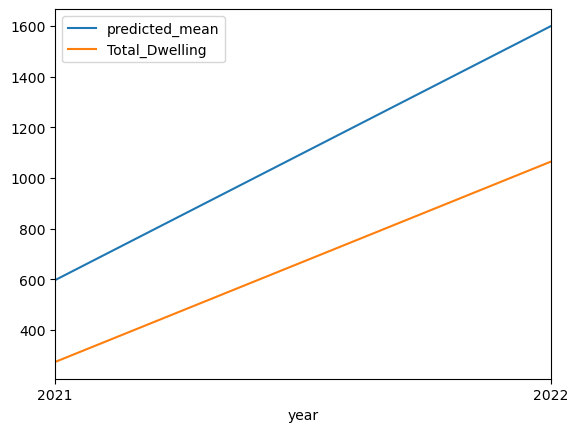

In [645]:
arima_model(dataC, (6,0,3),'t',0,15)

2021-01-01    1053.771980
2022-01-01    1381.035716
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  594.9466001277473


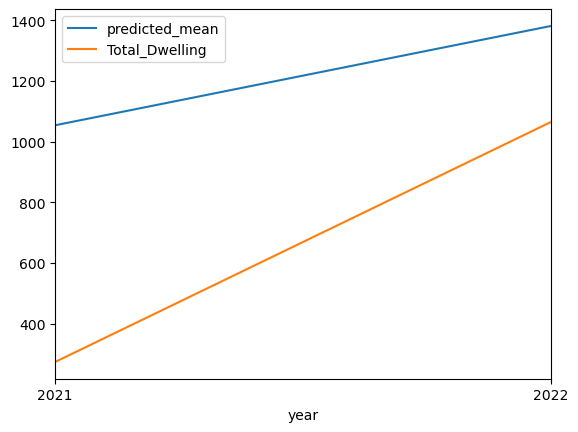

In [644]:
arima_model(dataC, (5,0,3),'c',0,65)

2021-01-01   -112.426869
2022-01-01    984.049698
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  279.17617757000914


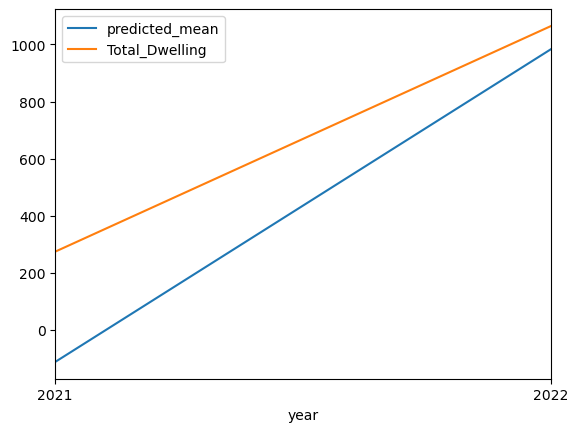

In [643]:
arima_model(dataC, (5,0,3),'t',0,70)

2021-01-01    336.654915
2022-01-01    218.567159
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  600.1558935965262


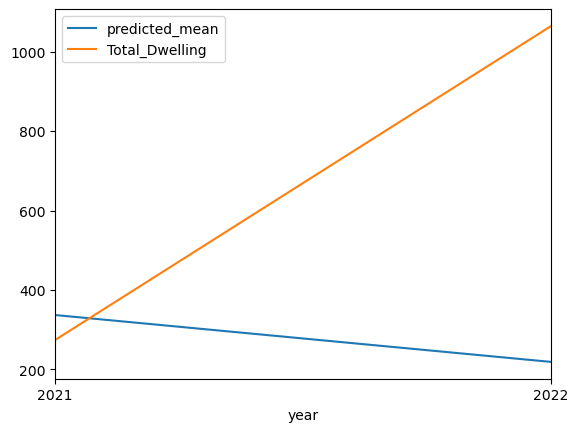

In [642]:
arima_model(dataC, (0,0,2),'t',0,55)

2021-01-01     158.849413
2022-01-01    1247.477186
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  152.57388590161312


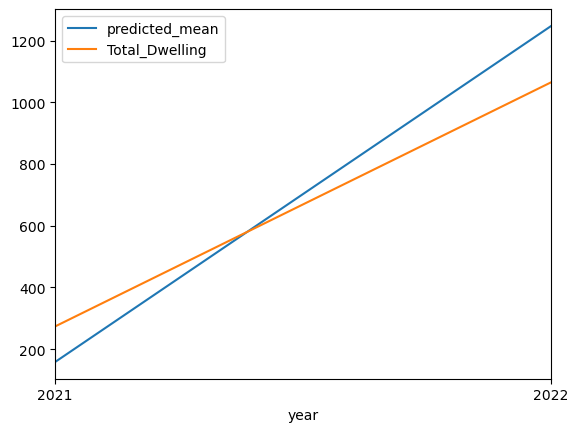

In [641]:
arima_model(dataC, (2,0,4),'t',0,45)

2021-01-01    689.888948
2022-01-01    689.888948
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  396.0252001968732


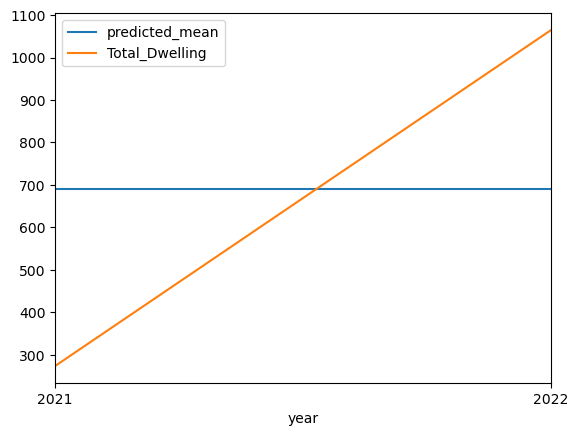

In [635]:
arima_model(dataC, (0,0,0),'c',0,1)

2021-01-01      27.473271
2022-01-01    1103.050256
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  176.38487773216087


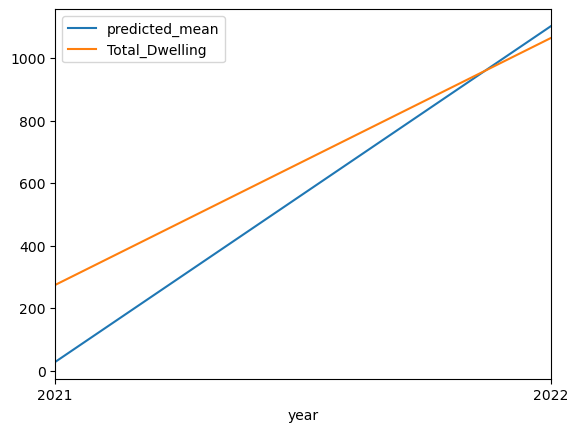

In [629]:
arima_model(dataC, (2,0,4),'t',0,80)

2021-01-01      11.214528
2022-01-01    1114.542788
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  189.09084069015628


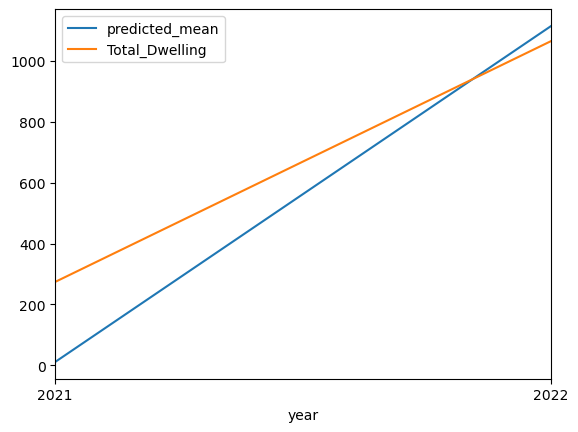

In [623]:
arima_model(dataC, (2,0,4),'t',0,55)

2021-01-01     224.260914
2022-01-01    1044.971320
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  37.91519928208955


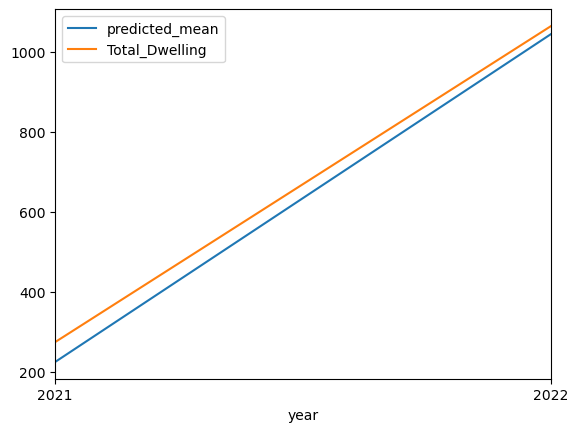

In [665]:
arima_model(dataC, (4,0,3),'t',0,60)

2021-01-01     224.260914
2022-01-01    1044.971320
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  37.91519928208955


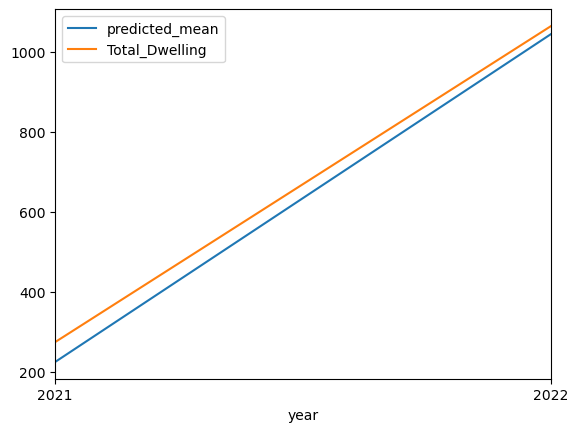

In [671]:
arima_model(dataC, (4,0,3),'t',0,60)

2021-01-01     265.294525
2022-01-01    1020.783868
2023-01-01     173.156168
2024-01-01     900.068257
2025-01-01     -88.809174
2026-01-01     595.895438
2027-01-01     509.716554
Freq: AS-JAN, Name: predicted_mean, dtype: float64


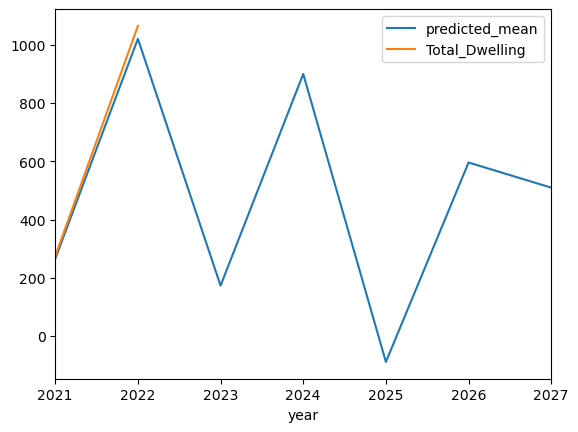

In [673]:
arima_model(dataC, (5,0,2),'t',5,70)

# Conclusion
the model underwent testing involving a range of random hyperparameters, ultimately revealing that the combination (5, 0, 2) for order, with a trend set to 't' and a trend offset of 70, produced the most favourable results by minimising the mean squared error. However, it is essential to acknowledge the presence of external factors that can significantly influence the model's predictive accuracy. Over the past three years, the building market has been marked by unprecedented unpredictability, primarily attributed to the challenges imposed by the global COVID-19 pandemic. These external dynamics underscore the importance of continuous monitoring and adaptation to ensure the model's robustness in the face of evolving real-world conditions.